<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
# Import ImageDataGenerator from tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.optimizers import SGD

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

plt.style.use('ggplot')

%matplotlib inline

%matplotlib inline

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
df=pd.read_excel('/content/Sample - Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
df[df['State']=='Texas']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.5440,7,0.20,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.4300,5,0.30,-143.4310
9920,9921,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9961,9962,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,65.5840,2,0.20,23.7742
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704


In [16]:
df['State'].value_counts()

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [17]:
df['Customer Name'].value_counts().sum()

9994

In [18]:
# Convert the 'Sales' column to numeric type, handling potential errors
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Calculate the sum of the 'Sales' column
df['Sales'].sum()

2297200.8603000003

In [19]:
# Group the DataFrame by 'Region' and calculate the sum of 'Sales' for each region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales

,Sales
Region,
Central,501239.8908
East,678781.2400
South,391721.9050
West,725457.8245


In [20]:
category_sales=df.groupby("Category")["Sales"].sum()
category_sales

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [21]:
subcategory_sales=df.groupby("Sub-Category")["Sales"].sum()
subcategory_sales

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
# Top 10 customers by total sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Sales:\n", top_customers)

Top 10 Customers by Sales:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [24]:
# Average sales by ship mode
avg_sales_by_shipmode = df.groupby('Ship Mode')['Sales'].mean()
print("\nAverage Sales by Ship Mode:\n", avg_sales_by_shipmode)


Average Sales by Ship Mode:
 Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64


In [25]:
# Correlation between sales and profit
correlation = df['Sales'].corr(df['Profit'])
print("\nCorrelation between Sales and Profit:", correlation)


Correlation between Sales and Profit: 0.4790643497377062


## Insights

 The dataset contains information about sales, profits, and various attributes related to orders.

 There are no missing values in the dataset.

 The 'Sales' column has a wide range of values, with a mean of approximately 230 and a standard deviation of 623.

 The 'Category' column has three unique values: 'Furniture', 'Office Supplies', and 'Technology'.

 The 'Sub-Category' column has 17 unique values.

 The 'Segment' column has three unique values: 'Consumer', 'Corporate', and 'Home Office'.

 The 'Ship Mode' column has four unique values: 'Second Class', 'Standard Class', 'First Class', and 'Same Day'.

 The 'State' column has 49 unique values.

 Texas is one of the states in the dataset.

 There are 793 unique customers in the dataset.

 The total sales amount is approximately 2.29 million dollars.

 The 'Technology' category has the highest total sales, followed by 'Furniture' and 'Office Supplies'.

 The 'Phones' sub-category has the highest total sales, followed by 'Chairs' and 'Storage'.

 The top 10 customers by total sales have been identified.

 The average sales for different ship modes have been calculated.

There is a positive correlation between sales and profit, indicating that higher sales generally lead to higher profits.

### Visualization

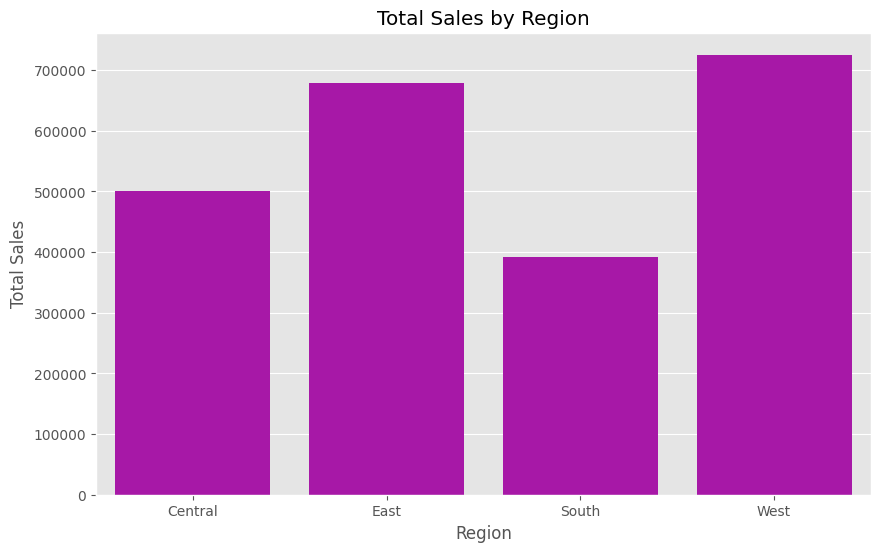

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values,color='m')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


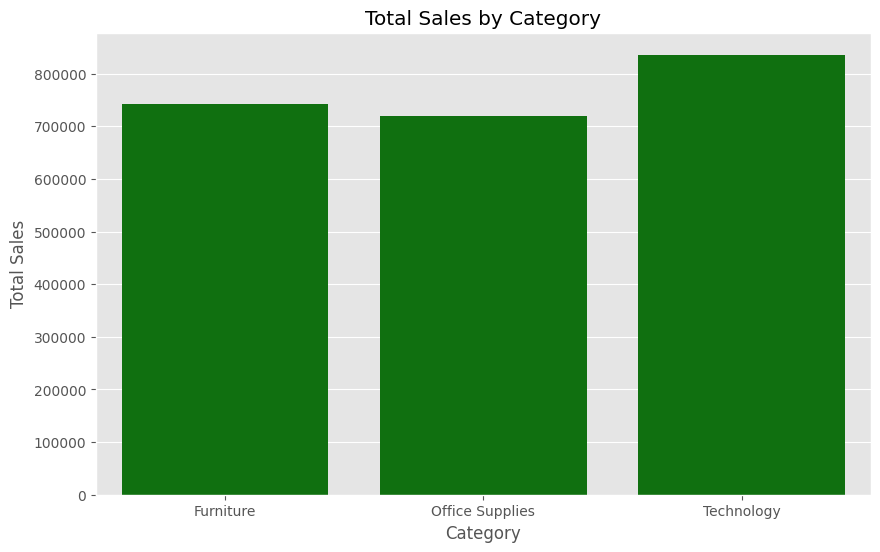

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values,color='g')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

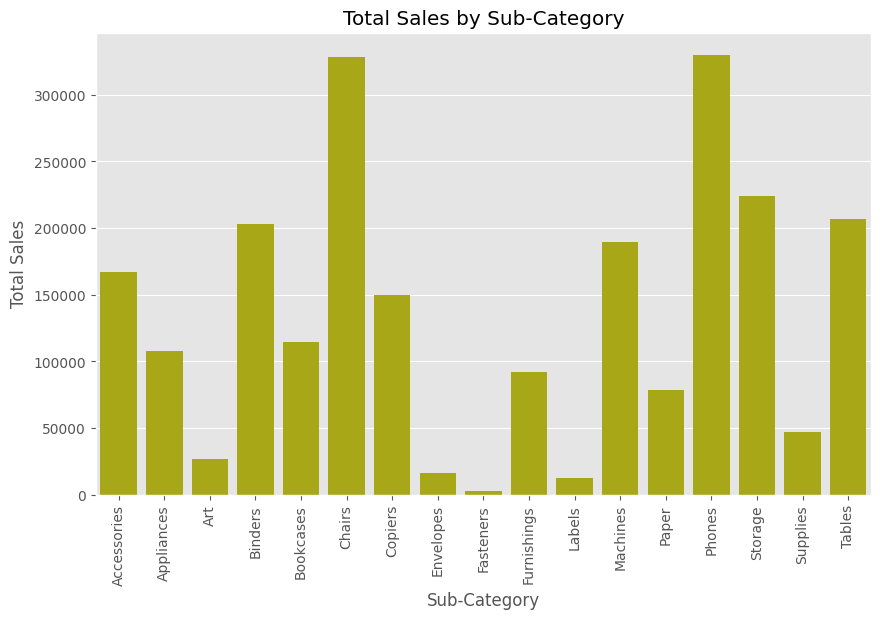

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values,color='y')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

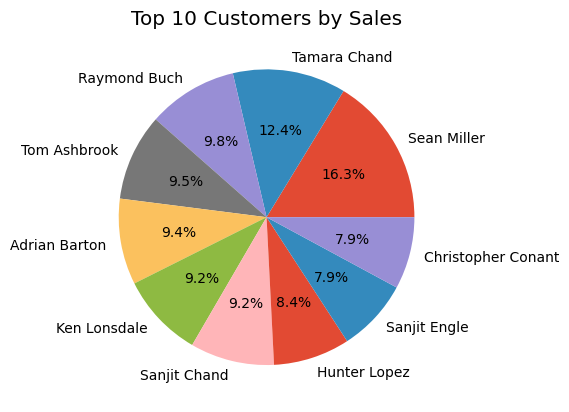

In [29]:
plt.pie(top_customers, labels=top_customers.index, autopct='%1.1f%%')
plt.title('Top 10 Customers by Sales')
plt.show()

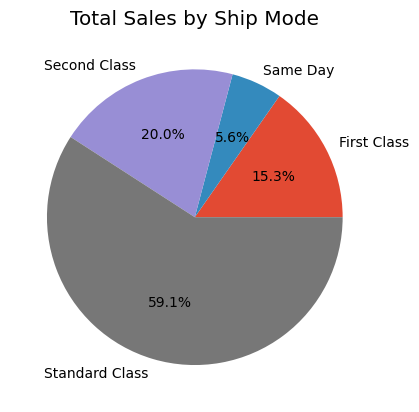

In [30]:
# Group the DataFrame by 'Ship Mode' and calculate the sum of 'Sales' for each ship mode
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum()

# Create a pie chart
plt.pie(shipmode_sales, labels=shipmode_sales.index, autopct='%1.1f%%')
plt.title('Total Sales by Ship Mode')
plt.show()




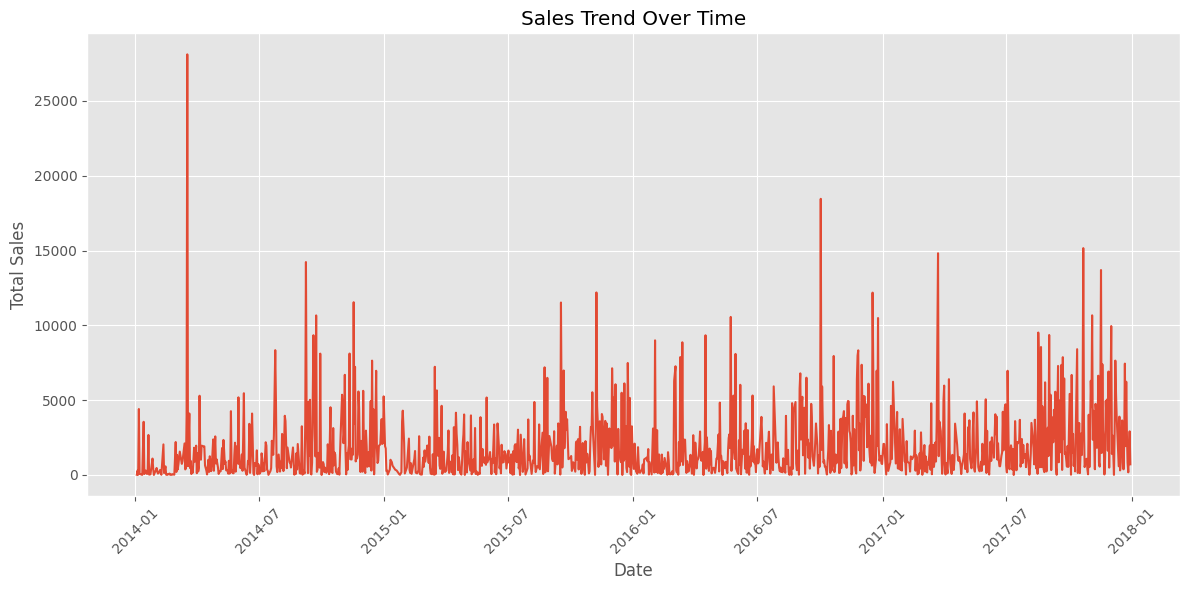

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
daily_sales = df.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


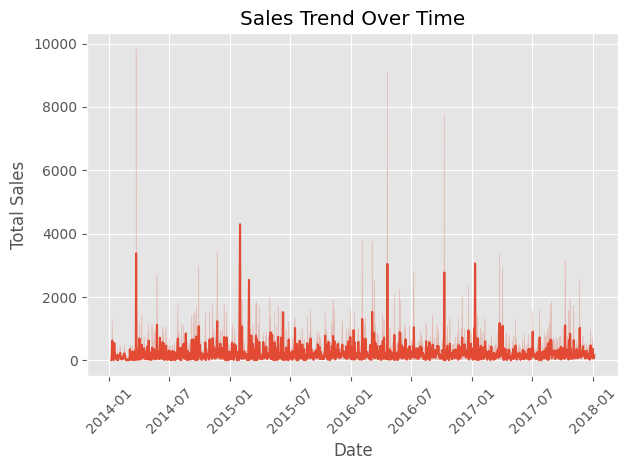

In [32]:
sns.lineplot(x='Ship Date', y='Sales', data=df)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

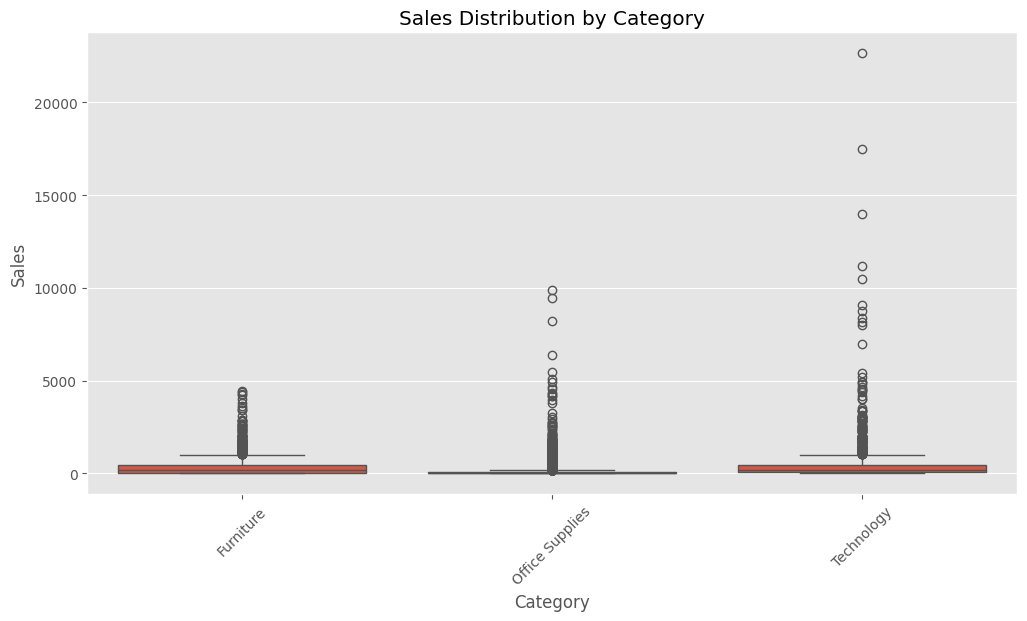

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

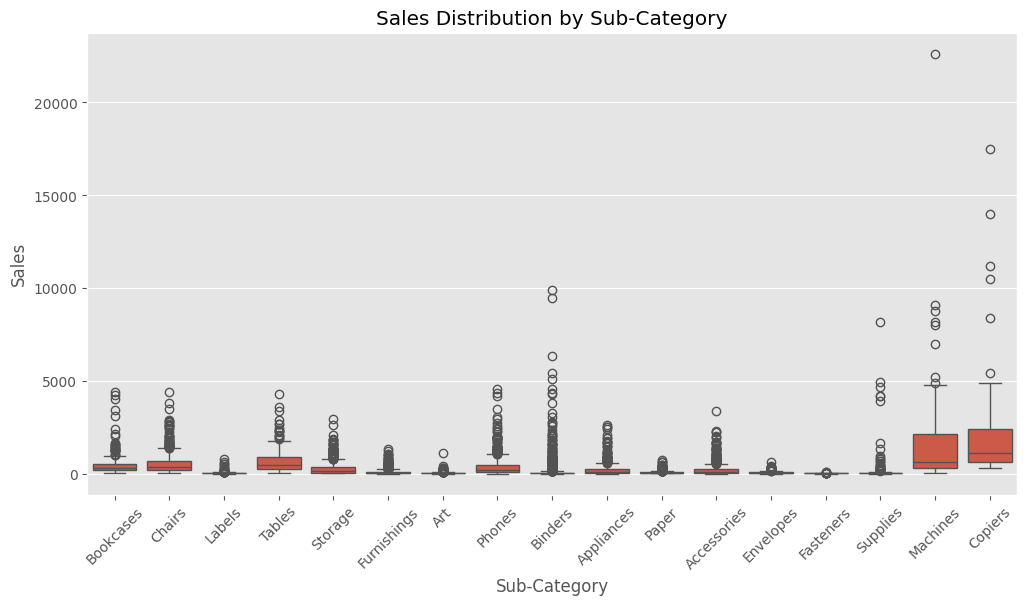

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales Distribution by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

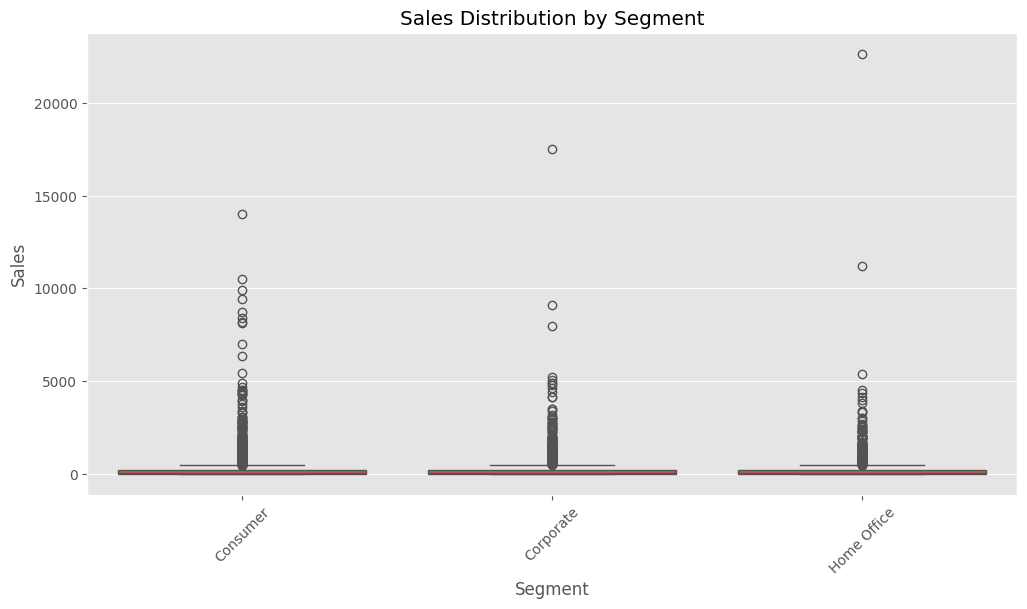

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

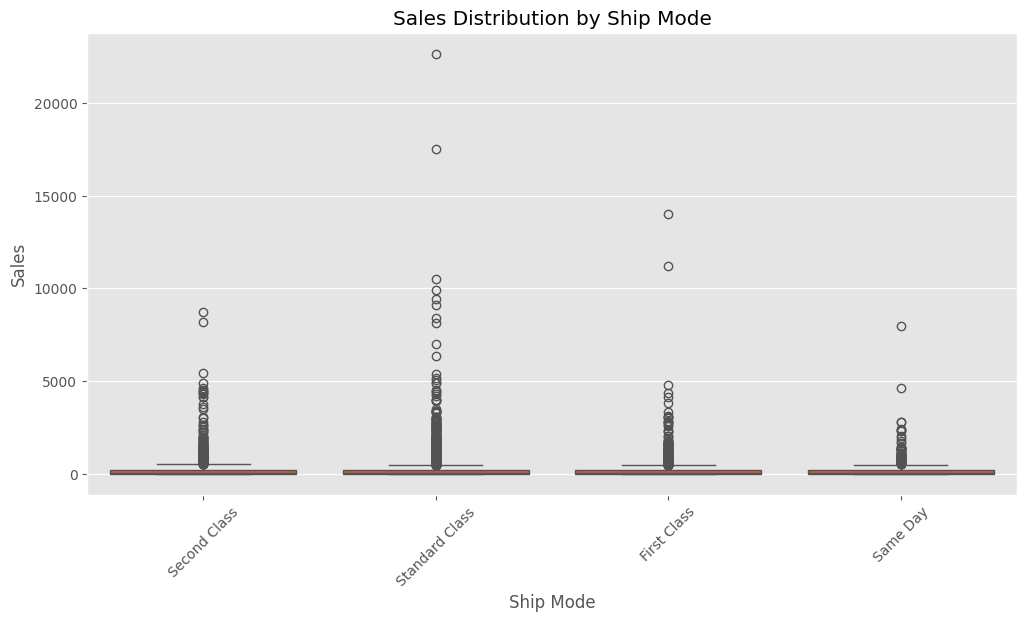

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.title('Sales Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()



<ipython-input-37-fbea332b473d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


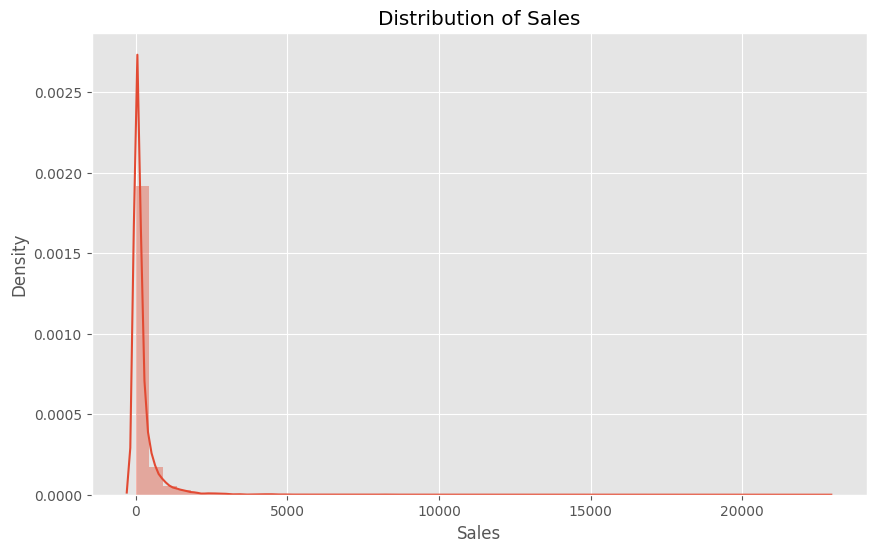

In [37]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()




<ipython-input-38-8534a545c676>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


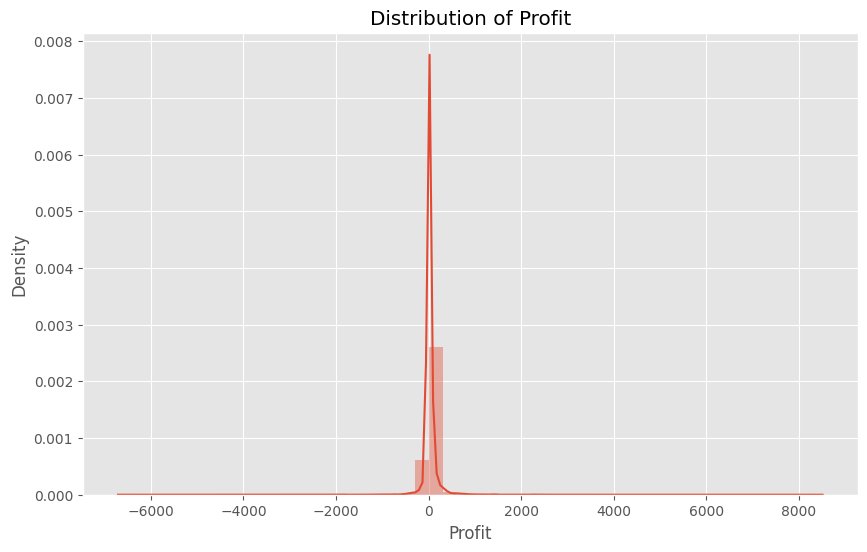

In [38]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Profit'])
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.show()

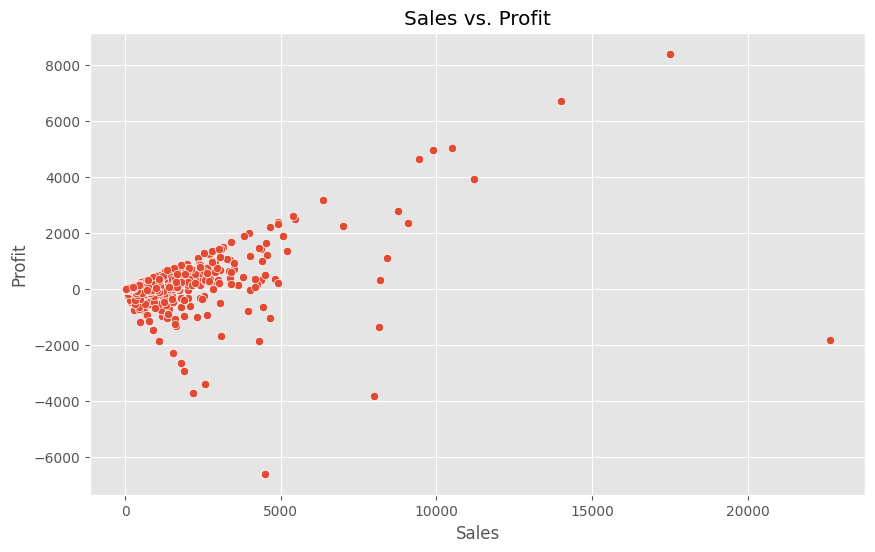

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

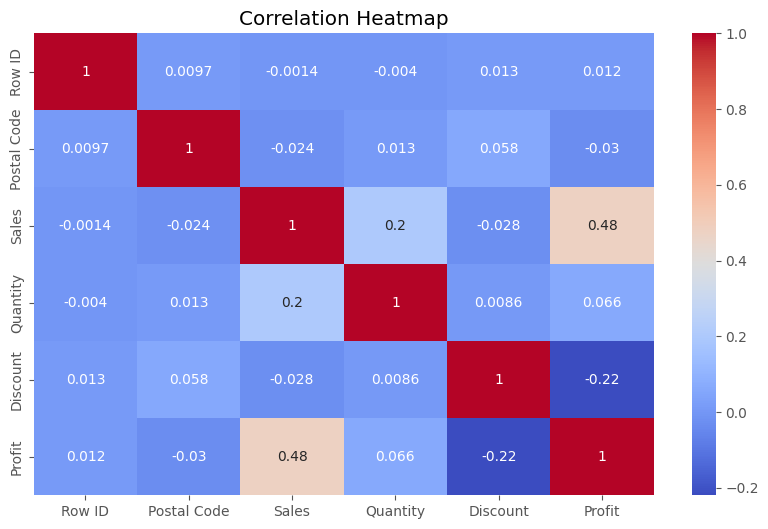

In [40]:
# Select only the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['float', 'int'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

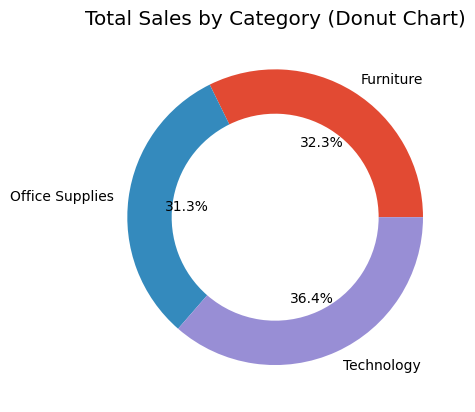

In [41]:
# Group the DataFrame by 'Category' and calculate the sum of 'Sales' for each category
category_sales = df.groupby('Category')['Sales'].sum()

# Create a donut chart
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Total Sales by Category (Donut Chart)')
plt.show()


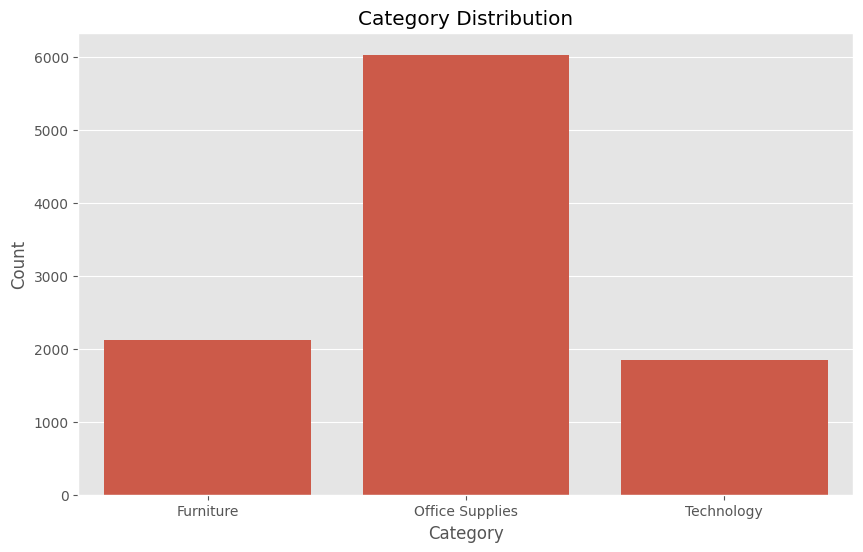

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

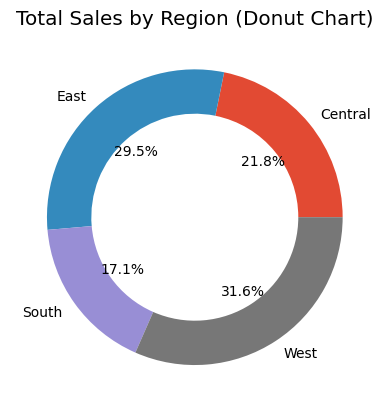

In [43]:
# Group the DataFrame by a categorical column and calculate a metric (e.g., sum of sales)
category_sales = df.groupby('Region')['Sales'].sum()

# Create a donut chart
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Total Sales by Region (Donut Chart)')
plt.show()




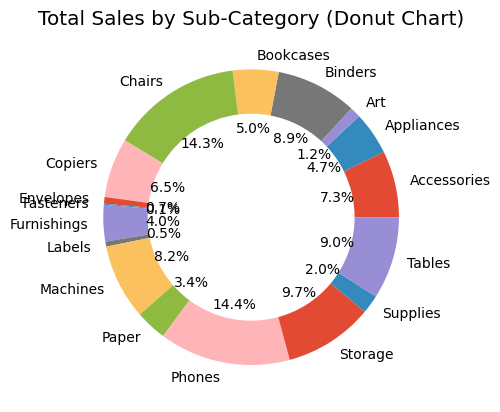

In [44]:
# Group the DataFrame by a categorical column and calculate a metric (e.g., sum of sales)
category_sales = df.groupby('Sub-Category')['Sales'].sum()

# Create a donut chart
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Total Sales by Sub-Category (Donut Chart)')
plt.show()

<ipython-input-45-d104e6cd550d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


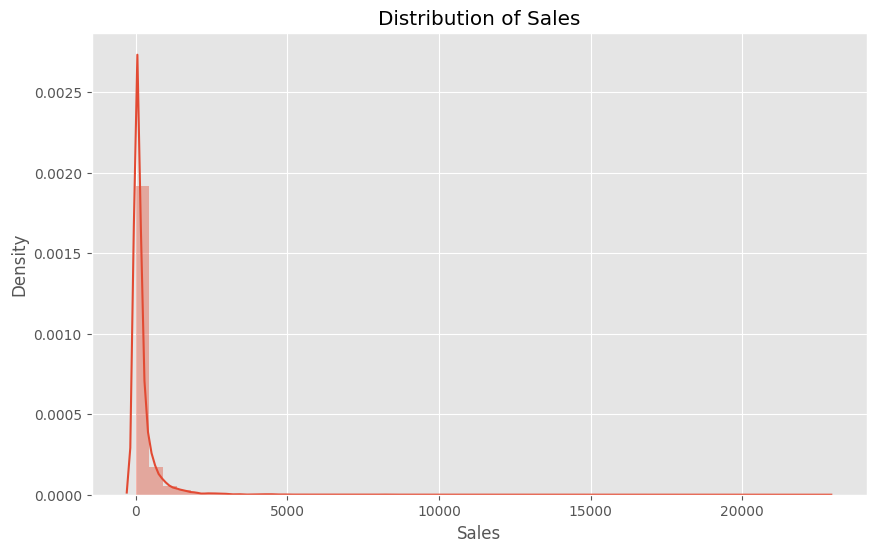

In [45]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()


### Insight

 Top-selling categories and sub-categories: Identify the categories and sub-categories that generate the highest sales. This information can be used to focus marketing efforts and inventory management on these high-performing areas.

 Regional sales performance: Analyze sales performance across different regions to identify areas of strength and weakness. This can help in making decisions about resource allocation and targeted marketing campaigns.

 Customer segmentation: Understand the different customer segments (e.g., Consumer, Corporate, Home Office) and their purchasing behavior. This can help in tailoring marketing messages and promotions to specific customer groups.

 Shipping mode preferences: Analyze the popularity of different shipping modes and their impact on sales. This can help in optimizing shipping options and improving customer satisfaction.

 Sales trends over time: Identify any trends or seasonality in sales data. This can help in forecasting future sales and planning inventory accordingly.

 Correlation between sales and profit: Understand the relationship between sales and profit to identify factors that drive profitability. This can help in making pricing and discount decisions.

 Product performance analysis: Analyze the sales and profitability of individual products or product groups to identify top performers and underperforming items. This can help in making decisions about product assortment and pricing.

 Customer lifetime value: Calculate the lifetime value of customers to identify high-value customers and focus on retention strategies.

 Sales forecasting: Use time series analysis or other forecasting techniques to predict future sales and plan inventory and resource allocation accordingly.

Market basket analysis: Identify products that are frequently purchased together to create bundle offers or cross-selling opportunities.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error

In [47]:
X = df[['Profit', 'Quantity', 'Discount']]
y = df['Sales']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 680377.4563719629


In [50]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest Regressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Logistic Regression (for classification, assuming 'Sales' is discretized)
y_train_class = (y_train > y_train.mean()).astype(int)
y_test_class = (y_test > y_test.mean()).astype(int)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_class)
y_pred_logistic = logistic_model.predict(X_test)

# Decision Tree Classifier
tree_class_model = DecisionTreeClassifier()
tree_class_model.fit(X_train, y_train_class)
y_pred_tree_class = tree_class_model.predict(X_test)

# Random Forest Classifier
forest_class_model = RandomForestClassifier()
forest_class_model.fit(X_train, y_train_class)
y_pred_forest_class = forest_class_model.predict(X_test)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train_class)
y_pred_svc = svc_model.predict(X_test)


In [51]:
models = [
    ("Linear Regression", y_pred_linear),
    ("Decision Tree Regressor", y_pred_tree),
    ("Random Forest Regressor", y_pred_forest),
    ("Support Vector Regressor", y_pred_svr),
    ("Logistic Regression", y_pred_logistic),
    ("Decision Tree Classifier", y_pred_tree_class),
    ("Random Forest Classifier", y_pred_forest_class),
    ("Support Vector Classifier", y_pred_svc),
]

In [56]:
for name, y_pred in models:
    if name.endswith("Regressor"):
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse}, MAE: {mae}, R2: {r2}")
    elif name.endswith("Classifier"):
        f1 = f1_score(y_test_class, y_pred)
        print(f"{name} - F1 Score: {f1}")

Decision Tree Regressor - MSE: 316941.7454613766, MAE: 112.52590343505088, R2: 0.4634464285409534
Random Forest Regressor - MSE: 272308.3297851157, MAE: 101.11992060026066, R2: 0.5390067450043219
Support Vector Regressor - MSE: 521050.0093760386, MAE: 168.6567889808803, R2: 0.11790968705461202
Decision Tree Classifier - F1 Score: 0.8100436681222708
Random Forest Classifier - F1 Score: 0.8136714443219404
Support Vector Classifier - F1 Score: 0.7294429708222812


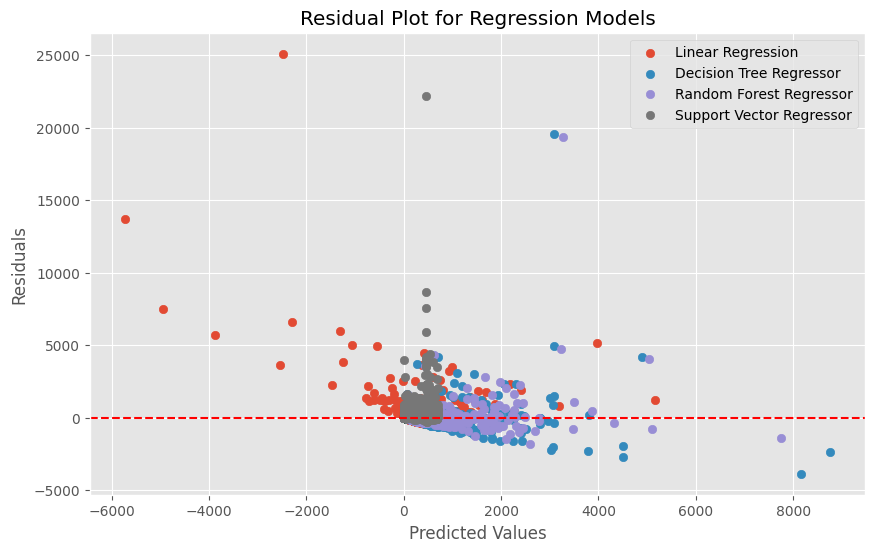

In [57]:
plt.figure(figsize=(10, 6))
for name, y_pred in models[:4]:  # Select regression models
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=name)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Regression Models")
plt.legend()
plt.show()


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_dl = model.predict(X_test_scaled)
mse_dl = mean_squared_error(y_test, y_pred_dl)
print("Deep Learning Model MSE:", mse_dl)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 352725.5938 - val_loss: 266899.5312
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 424797.9375 - val_loss: 224548.7656
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 285853.3750 - val_loss: 195896.0312
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 220121.7344 - val_loss: 180519.6406
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 293177.6250 - val_loss: 162674.2656
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239253.7969 - val_loss: 144798.6562
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206796.1562 - val_loss: 127272.0781
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162270.5938 - val_loss: 110488.3125
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139697.2188 - val_loss: 96655.6406
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92325.6562 - val_loss: 88467.4844
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1

In [59]:
# Define the improved model
model_improved = Sequential()
model_improved.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_improved.add(Dropout(0.2))  # Add dropout for regularization
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dropout(0.2))
model_improved.add(Dense(1))  # Output layer for regression

# Compile the improved model
model_improved.compile(optimizer='adam', loss='mean_squared_error')

# Train the improved model
model_improved.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the improved model
y_pred_dl_improved = model_improved.predict(X_test_scaled)
mse_dl_improved = mean_squared_error(y_test, y_pred_dl_improved)
print("Improved Deep Learning Model MSE:", mse_dl_improved)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 385905.7500 - val_loss: 243205.2812
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 366472.8750 - val_loss: 196322.7812
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255905.8281 - val_loss: 174564.0156
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 296511.1250 - val_loss: 152226.0625
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 178949.1562 - val_loss: 125817.2422
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143847.8906 - val_loss: 100595.0938
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122506.6406 - val_loss: 87037.9375
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125345.1797 - val_loss: 82358.9297
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81863.8125 - val_loss: 79245.8906
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77190.6250 - val_loss: 77100.8047
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2m